In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


In [3]:
file_path1 = "C:/Users/LAPTOP/Desktop/DIV/Fake News/Data/True.csv"
file_path2 = "C:/Users/LAPTOP/Desktop/DIV/Fake News/Data/Fake.csv"

In [4]:
df1 = pd.read_csv(file_path1)

In [5]:
df1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
title      21417 non-null object
text       21417 non-null object
subject    21417 non-null object
date       21417 non-null object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
#creating a new column called class and setting the target to 1

In [8]:
df1['class'] = 'True'

In [9]:
df1.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [10]:
df2 = pd.read_csv(file_path2)

In [11]:
df2.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
#creating a new column for fake news called class and giving it a target 0

In [13]:
df2['class'] = 'Fake'

In [63]:
df2[df2['class'] == 'Fake']['title'][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [19]:
#merging the two dataframes

In [20]:
df = pd.concat([df1,df2], ignore_index = True)

In [21]:
df

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",True
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",True
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",True
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",True
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",True


In [22]:
#dropping some of the columns

In [23]:
df.drop(columns = ['title', 'subject', 'date'], inplace= True)

In [24]:
df.head()

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,True
1,WASHINGTON (Reuters) - Transgender people will...,True
2,WASHINGTON (Reuters) - The special counsel inv...,True
3,WASHINGTON (Reuters) - Trump campaign adviser ...,True
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,True


In [25]:
df = sklearn.utils.shuffle(df)

In [26]:
df

,text,class
4943,WASHINGTON (Reuters) - One of U.S. President D...,True
39546,In our iconoclastic efforts to erase the past...,Fake
38765,,Fake
29845,During a campaign event at Iowa s Wesleyan Uni...,Fake
14595,MEXICO CITY (Reuters) - Mexico on Thursday und...,True
39418,The information below is almost like a satire ...,Fake
5485,MOSCOW (Reuters) - The Kremlin said on Monday ...,True
19097,"KIRKUK, Iraq (Reuters) - The governorate of Ki...",True
14489,CAIRO (Reuters) - Lebanon Prime Minister Saad ...,True
24774,"Recently, at one of his thank you rallies, D...",Fake


In [27]:
#checking for any null values

In [28]:
df.isna().sum()

text     0
class    0
dtype: int64

In [29]:
#there are no null values

In [30]:
#removing special characters and cleaning the data

In [31]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string

In [32]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [33]:
df['text'] = df['text'].apply(wordopt)

In [34]:
df

,text,class
4943,washington reuters one of u s president d...,True
39546,in our iconoclastic efforts to erase the past...,Fake
38765,,Fake
29845,during a campaign event at iowa s wesleyan uni...,Fake
14595,mexico city reuters mexico on thursday und...,True
39418,the information below is almost like a satire ...,Fake
5485,moscow reuters the kremlin said on monday ...,True
19097,kirkuk iraq reuters the governorate of ki...,True
14489,cairo reuters lebanon prime minister saad ...,True
24774,recently at one of his thank you rallies d...,Fake


In [35]:
#visualising our data

In [36]:
# plt.figure(figsize = (8,8))
# plt.scatter(df['text'] , df['class'], color = "k" , alpha = 0.1)

# plt.xlabel('text')
# plt.ylabel('class')

In [37]:
#testing and spliting the data

In [38]:
x = df['text']
y = df['class']

In [39]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.3, random_state =10)

In [40]:
#converting text ro vectors

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [51]:
pipeline = Pipeline([
    ('bag', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('reg', LogisticRegression(random_state = 42))
])


pipeline.fit(x_train, y_train)

Pipeline(steps=[('bag', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('reg', LogisticRegression(random_state=42))])

In [52]:
pipeline.score(x_test, y_test)

0.9856718634001485

In [53]:
from sklearn.metrics import plot_confusion_matrix

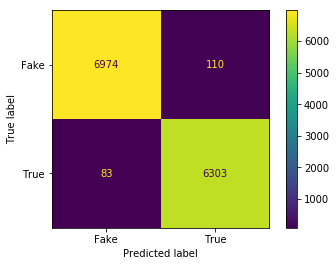

In [54]:
plot_confusion_matrix(pipeline, x_test, y_test)

In [55]:
import pickle

In [56]:
pickle.dump(pipeline, open("model.pkl", "wb"))
model = pickle.load(open("model.pkl" , "rb"))

In [61]:
model.predict(['House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys  don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but team Trump ran with him being merely a coffee boy.In May 2016, Papadopoulos revealed to Australian diplomat Alexander Downer that Russian officials were shopping around possible dirt on then-Democratic presidential nominee Hillary Clinton. Exactly how much Mr. Papadopoulos said that night at the Kensington Wine Rooms with the Australian, Alexander Downer, is unclear,  the report states.  But two months later, when leaked Democratic emails began appearing online, Australian officials passed the information about Mr. Papadopoulos to their American counterparts, according to four current and former American and foreign officials with direct knowledge of the Australians  role. Papadopoulos pleaded guilty to lying to the F.B.I. and is now a cooperating witness with Special Counsel Robert Mueller s team.This isn t a presidency. It s a badly scripted reality TV show.Photo by Win McNamee/Getty Images.'])

array(['Fake'], dtype=object)

In [106]:
str(Elvis is tall)

NameError: name 'Elvis' is not defined

In [117]:
y_pred = model.predict_proba(["Elvis is tall"])

In [123]:
y_pred[0][0]

0.908833116907169

In [129]:
f'Probability that it is Fake: {round(y_pred[0][1]*100,2)}%'

'Probability that it is Fake: 9.12%'

In [115]:
y_train.unique()

array(['Fake', 'True'], dtype=object)